In [1]:
%matplotlib inline  
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt


/Users/Andrew-MB/DEV/08.PYTHON/01.WORKSPACE/slowcampus0202/env/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)
/Users/Andrew-MB/DEV/08.PYTHON/01.WORKSPACE/slowcampus0202/env/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# 1차3원 방정식을 NN으로 근사화(approximation) 하고자 하는 것임.
# y = w * x + b 함수
# 아래의 W, B를 NN이 찾아내는지 확인하고자 함.

def myfunc(X):
  ''' X는 3차원 데이타라고 가정. len()이 3인 리스트여야 한다.'''  
  W = [1.3, 5.5, 2.7] 
  B = [2.6, -1.2, 3.5] 
  Y = [x*w + b + random.random()*0.1 for x, w, b in zip(X, W, B) ]
  return Y

print(myfunc([2,1,3]))

[5.238155232446098, 4.389123504301671, 11.69336350302609]


In [3]:
# random.random() -- 0.0 ~ 1.0
NUM_DATA = 200          # 데이터 갯수
XVALUE = 5              # X값의 범위 (0.0 ~ 5.0)
# type: python list
xlist = [[random.random() * XVALUE for j in range(3)]  for i in range(NUM_DATA)]
xlist.sort()            # sorting
ylist = [myfunc(x) for x in xlist]
print('x, y', xlist[0], ylist[0])


x, y [0.02677016353141992, 1.366819771903619, 4.860897561570418] [2.721368111987736, 6.4084574567835375, 16.71590935066246]


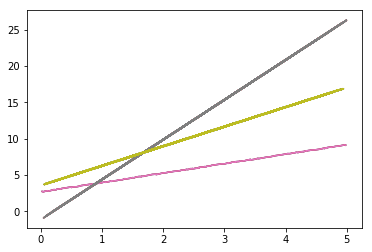

In [4]:
# actual data 산점도
fig, ax = plt.subplots()
for i in range(3):
    x = [x[i] for x in xlist]
    y = [y[i] for y in ylist]
    ax.plot(xlist, ylist, label='%d' % i)
plt.show()

In [5]:
# type 변환 python list -> numpy ndarray
# type: numpy ndarray
xlist = np.array(xlist)
ylist = np.array(ylist)
print('xlist.shape :',xlist.shape)  # shape ==  (10,3)
print('ylist.shape :',ylist.shape)  # shape ==  (10,3)

xlist.shape : (200, 3)
ylist.shape : (200, 3)


## NN 구조 정의
input layer: Node3개,
output layer: Node3개
hidden layer 없음

In [6]:
X = tf.placeholder(tf.float32, [None, 3], name='inputPlace')
Y = tf.placeholder(tf.float32, [None, 3])
W = tf.Variable(tf.random_normal([3,3], -1, 1), name='weight')
B = tf.Variable(tf.random_normal([3], -1, 1), name='bias')
Y2 = tf.matmul(X, W) + B   # [1,1]행렬 x [1,1]행렬 + [1]

# 손실 함수
cost_function = tf.reduce_mean(tf.square(Y2 - Y))
# 옵티마이저
optimizer = tf.train.AdamOptimizer(learning_rate=0.1)
training = optimizer.minimize(cost_function)

In [8]:
# loss list
see_loss_summary = []           # Record loss values for plot

In [9]:
# Session 시작
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for i in range(500):
  res, cost = sess.run([training, cost_function],
                                     feed_dict={X: xlist, Y:ylist})
  if cost < 0.00001:
    break

  if i % 25 == 0:
    y2, w, b = sess.run([Y2, W, B], feed_dict={X: xlist, Y: ylist})

  print('LOSS', cost)
  print('W', w, 'bias', b)
  see_loss_summary.append(cost)



LOSS 314.91623
W [[ 1.6293613  -1.6021718  -0.33787137]
 [-0.06786724 -1.022409   -1.5589846 ]
 [ 0.82424486 -1.0063734  -0.00207647]] bias [-2.6444674  -0.88778687  0.6338185 ]
LOSS 289.47952
W [[ 1.6293613  -1.6021718  -0.33787137]
 [-0.06786724 -1.022409   -1.5589846 ]
 [ 0.82424486 -1.0063734  -0.00207647]] bias [-2.6444674  -0.88778687  0.6338185 ]
LOSS 265.6735
W [[ 1.6293613  -1.6021718  -0.33787137]
 [-0.06786724 -1.022409   -1.5589846 ]
 [ 0.82424486 -1.0063734  -0.00207647]] bias [-2.6444674  -0.88778687  0.6338185 ]
LOSS 243.48766
W [[ 1.6293613  -1.6021718  -0.33787137]
 [-0.06786724 -1.022409   -1.5589846 ]
 [ 0.82424486 -1.0063734  -0.00207647]] bias [-2.6444674  -0.88778687  0.6338185 ]
LOSS 222.8463
W [[ 1.6293613  -1.6021718  -0.33787137]
 [-0.06786724 -1.022409   -1.5589846 ]
 [ 0.82424486 -1.0063734  -0.00207647]] bias [-2.6444674  -0.88778687  0.6338185 ]
LOSS 203.59406
W [[ 1.6293613  -1.6021718  -0.33787137]
 [-0.06786724 -1.022409   -1.5589846 ]
 [ 0.82424486 -1.

LOSS 4.570622
W [[1.5219928  0.45025223 0.38336816]
 [0.2595116  3.1687856  0.16492496]
 [0.20189075 0.7686837  2.5398269 ]] bias [0.7845097 1.8323789 2.497878 ]
LOSS 4.477783
W [[1.5219928  0.45025223 0.38336816]
 [0.2595116  3.1687856  0.16492496]
 [0.20189075 0.7686837  2.5398269 ]] bias [0.7845097 1.8323789 2.497878 ]
LOSS 4.386704
W [[1.5219928  0.45025223 0.38336816]
 [0.2595116  3.1687856  0.16492496]
 [0.20189075 0.7686837  2.5398269 ]] bias [0.7845097 1.8323789 2.497878 ]
LOSS 4.297342
W [[1.5219928  0.45025223 0.38336816]
 [0.2595116  3.1687856  0.16492496]
 [0.20189075 0.7686837  2.5398269 ]] bias [0.7845097 1.8323789 2.497878 ]
LOSS 4.2096505
W [[1.5219928  0.45025223 0.38336816]
 [0.2595116  3.1687856  0.16492496]
 [0.20189075 0.7686837  2.5398269 ]] bias [0.7845097 1.8323789 2.497878 ]
LOSS 4.1235814
W [[1.5219928  0.45025223 0.38336816]
 [0.2595116  3.1687856  0.16492496]
 [0.20189075 0.7686837  2.5398269 ]] bias [0.7845097 1.8323789 2.497878 ]
LOSS 4.0390844
W [[1.52199

LOSS 0.6452352
W [[ 1.3573534  -0.01402326  0.11989212]
 [ 0.06573028  4.352859    0.12747222]
 [ 0.05065894  0.11295439  2.7721148 ]] bias [2.1730924 1.7398491 2.676795 ]
LOSS 0.6330344
W [[ 1.3573534  -0.01402326  0.11989212]
 [ 0.06573028  4.352859    0.12747222]
 [ 0.05065894  0.11295439  2.7721148 ]] bias [2.1730924 1.7398491 2.676795 ]
LOSS 0.62114567
W [[ 1.3573534  -0.01402326  0.11989212]
 [ 0.06573028  4.352859    0.12747222]
 [ 0.05065894  0.11295439  2.7721148 ]] bias [2.1730924 1.7398491 2.676795 ]
LOSS 0.60956174
W [[ 1.3573534  -0.01402326  0.11989212]
 [ 0.06573028  4.352859    0.12747222]
 [ 0.05065894  0.11295439  2.7721148 ]] bias [2.1730924 1.7398491 2.676795 ]
LOSS 0.5982759
W [[ 1.3573534  -0.01402326  0.11989212]
 [ 0.06573028  4.352859    0.12747222]
 [ 0.05065894  0.11295439  2.7721148 ]] bias [2.1730924 1.7398491 2.676795 ]
LOSS 0.58728087
W [[ 1.3573534  -0.01402326  0.11989212]
 [ 0.06573028  4.352859    0.12747222]
 [ 0.05065894  0.11295439  2.7721148 ]] bi

LOSS 0.23406856
W [[ 1.3106077  -0.21419586  0.0803531 ]
 [ 0.01114868  4.9161263   0.09588543]
 [ 0.0070237  -0.16397285  2.7771757 ]] bias [2.5716836 1.4897467 2.8548055]
LOSS 0.23235138
W [[ 1.3106077  -0.21419586  0.0803531 ]
 [ 0.01114868  4.9161263   0.09588543]
 [ 0.0070237  -0.16397285  2.7771757 ]] bias [2.5716836 1.4897467 2.8548055]
LOSS 0.23066838
W [[ 1.3106077  -0.21419586  0.0803531 ]
 [ 0.01114868  4.9161263   0.09588543]
 [ 0.0070237  -0.16397285  2.7771757 ]] bias [2.5716836 1.4897467 2.8548055]
LOSS 0.22901896
W [[ 1.3106077  -0.21419586  0.0803531 ]
 [ 0.01114868  4.9161263   0.09588543]
 [ 0.0070237  -0.16397285  2.7771757 ]] bias [2.5716836 1.4897467 2.8548055]
LOSS 0.22740151
W [[ 1.3061669e+00 -2.3835967e-01  7.3537476e-02]
 [ 5.9598438e-03  5.0123515e+00  8.7716393e-02]
 [ 2.8836899e-03 -1.9904929e-01  2.7713320e+00]] bias [2.609537  1.3864475 2.9120035]
LOSS 0.22581533
W [[ 1.3061669e+00 -2.3835967e-01  7.3537476e-02]
 [ 5.9598438e-03  5.0123515e+00  8.7716393

 [-8.2361634e-04 -2.0838352e-01  2.7437730e+00]] bias [2.6434183  0.82464844 3.1623726 ]
LOSS 0.11877515
W [[ 1.3021919e+00 -2.2953832e-01  4.4334240e-02]
 [ 1.3175898e-03  5.2164140e+00  5.3306479e-02]
 [-8.2361634e-04 -2.0838352e-01  2.7437730e+00]] bias [2.6434183  0.82464844 3.1623726 ]
LOSS 0.118209265
W [[ 1.3021919e+00 -2.2953832e-01  4.4334240e-02]
 [ 1.3175898e-03  5.2164140e+00  5.3306479e-02]
 [-8.2361634e-04 -2.0838352e-01  2.7437730e+00]] bias [2.6434183  0.82464844 3.1623726 ]
LOSS 0.117645405
W [[ 1.3021919e+00 -2.2953832e-01  4.4334240e-02]
 [ 1.3175898e-03  5.2164140e+00  5.3306479e-02]
 [-8.2361634e-04 -2.0838352e-01  2.7437730e+00]] bias [2.6434183  0.82464844 3.1623726 ]
LOSS 0.117083624
W [[ 1.3021919e+00 -2.2953832e-01  4.4334240e-02]
 [ 1.3175898e-03  5.2164140e+00  5.3306479e-02]
 [-8.2361634e-04 -2.0838352e-01  2.7437730e+00]] bias [2.6434183  0.82464844 3.1623726 ]
LOSS 0.116523795
W [[ 1.3021919e+00 -2.2953832e-01  4.4334240e-02]
 [ 1.3175898e-03  5.2164140e+

 [-8.5111271e-04 -1.7653920e-01  2.7311039e+00]] bias [2.6436706  0.49742663 3.2772813 ]
LOSS 0.07746833
W [[ 1.3021625e+00 -1.9441934e-01  3.0912792e-02]
 [ 1.2831101e-03  5.2685800e+00  3.7553176e-02]
 [-8.5111271e-04 -1.7653920e-01  2.7311039e+00]] bias [2.6436706  0.49742663 3.2772813 ]
LOSS 0.077059515
W [[ 1.3021625e+00 -1.9441934e-01  3.0912792e-02]
 [ 1.2831101e-03  5.2685800e+00  3.7553176e-02]
 [-8.5111271e-04 -1.7653920e-01  2.7311039e+00]] bias [2.6436706  0.49742663 3.2772813 ]
LOSS 0.07665238
W [[ 1.3021625e+00 -1.9441934e-01  3.0912792e-02]
 [ 1.2831101e-03  5.2685800e+00  3.7553176e-02]
 [-8.5111271e-04 -1.7653920e-01  2.7311039e+00]] bias [2.6436706  0.49742663 3.2772813 ]
LOSS 0.07624692
W [[ 1.3021625e+00 -1.9441934e-01  3.0912792e-02]
 [ 1.2831101e-03  5.2685800e+00  3.7553176e-02]
 [-8.5111271e-04 -1.7653920e-01  2.7311039e+00]] bias [2.6436706  0.49742663 3.2772813 ]
LOSS 0.07584312
W [[ 1.3021625e+00 -1.9441934e-01  3.0912792e-02]
 [ 1.2831101e-03  5.2685800e+00 

No handles with labels found to put in legend.


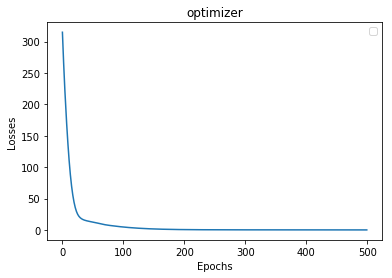

In [10]:
# Plot the accuracy and cost summaries
f, ax1 = plt.subplots()

ax1.plot(see_loss_summary)    # GradientDescentOptimizer
ax1.set_title('optimizer')

plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend()
plt.show()